# Тест 1.1

| <font size=3>№</font> | <font size=3>Название задачи</font> | <font size=3>Общее число баллов за решение</font> | <font size=3>Оценка времени, необходимого для решения, мин</font> | <font size=3>Число строк кода</font> | <font size=3>Идейная сложность</font> | <font size=3>Требуемая внимательность</font> |
| :---: | :---: | :---: | :---: | :---: | :---: | :---: |
| <font size=3>1</font> | <font size=3>Колокол</font> | <font size=3>1.5</font> | 15 | 16 | 1.5 | 1 |
| <font size=3>2</font> | <font size=3>Устойчивая быстрая сортировка</font> | <font size=3>2.5</font> | 50, если все писать с нуля | 41 | 2.5 | 2.5 |
| <font size=3>3</font> | <font size=3>LSD и система счисления</font> | <font size=3>3.5</font> | 50 | 120(~40) | 2 | 1 |
| <font size=3>4</font> | <font size=3>Гайки и болты</font> | <font size=3>4</font> | 50 | 40(20) | 5 | 4 |
| <font size=3>5</font> | <font size=3>Сортировка слиянием с маленьким буфером</font> | <font size=3>3</font> | 35 | 26(12) | 2.5 | 3 |
| <font size=3>6</font> | <font size=3>MSD для сортировки целых чисел</font> | <font size=3>3</font> | 40 | 46 | 3 | 3 |
| <font size=3>7</font> | <font size=3>Обращение односвязного списка</font> | <font size=3>1.5</font> | 10 | 10 | 2 | 1 |
| <font size=3>ВСЕГО</font> | <font size=3>&nbsp;</font> | <font size=3>19</font> | 250 | 299(185) | | |

>В столбце "Число строк кода" в скобках указывается, сколько строк нужно написать, если Вы используете заготовки из домашнего задания или семинара.

# Задача 1. Колокол

Есть список целых чисел от `1` до `N`. Переставьте элементы списка `L` так, чтобы наименьший элемент стоял на нулевой позиции, следующий за ним на последней и т.д.

Программа не должна использовать дополнительную память, разрешается только перестановка элементов списка.

##### Решите программу с использованием не более `N` перестановок

На вход подается число `N`, а на выходе должны быть целые числа, расположенные в требуемом порядке.

### Примеры работы программы

| <font size=3>Входные данные</font> | <font size=3>Выходные данные</font> |
| :---: | :---: |
| <font size=3>1</font> | <font size=3>1</font> |
| <font size=3>2</font> | <font size=3>1 2</font> |
| <font size=3>3</font> | <font size=3>1 3 2</font> |
| <font size=3>10</font> | <font size=3>1 3 5 7 9 10 8 6 4 2</font> |

### Критерии

За првильное решение начисляется 1.5 балла

In [27]:
N = int(input())
L = list(range(1, N+1))

def index(n):
    q = (n-1) // 2
    oddity = (n-1) % 2
    return [q, N-1-q][oddity]

for i in range(N-1):
    while True:
        idx = index(L[i])
        if i == idx:
            break
        L[i], L[idx] = L[idx], L[i]
        
print(' '.join(map(str, L)))

3
1 3 2


# Задача 2. Устойчивая быстрая сортировка

Реализуйте устойчивый вариант быстрой сортировки на основе рабиения Ломуто. Функция `stable_lomuto_sort()` должна принимать на вход сортируемый список и ключ `key` (функцию, используемую для сортировки, как во встроенной функции `sorted()`). Затраты памяти не должны превышать $O(n)$.

Функция для сортировки должна корректно работать с данными любого типа.

### Примеры работы программы

\#1

```python
>>> L = [(2, 19), (2, 2), (0, 6), (3, 15), (3, 13), (2, 17), (1, 20), (0, 2), (2, 4), (1, 12)]
>>> stable_lomuto_sort(L, lambda x: x[0])
>>> L
[(0, 6), (0, 2), (1, 20), (1, 12), (2, 19), (2, 2), (2, 17), (2, 4), (3, 15), (3, 13)]
```
\#2

```python
>>> L = [-4, 3, -2, -1, 0, -2, 2, 0, -5, -4, -3, 1, -5, 5, 4, 1, -3, -4, 3]
>>> stable_lomuto_sort(L, abs)
>>> L
[0, 0, -1, 1, 1, -2, -2, 2, 3, -3, -3, 3, -4, -4, 4, -4, -5, -5, 5]
```
\#3

```python
>>> L = ['qvsqy', 'ggdpe', 'bfo', 'e', 'pty', 'nabgq', 'gxozwc', 'pywppoc', 'cill', 'tpyauyn', 'xlatg', 'gcgv']
>>> stable_lomuto_sort(L, len)
>>> L
['e', 'bfo', 'pty', 'cill', 'gcgv', 'qvsqy', 'ggdpe', 'nabgq', 'xlatg', 'gxozwc', 'pywppoc', 'tpyauyn']
```

### Критерии

Правильное эфеективное решение оценвается в 2.5 балла.

In [51]:
import string

def quick_sort(L, lo, hi, less):
    if hi-lo > 0:
        p = lomuto_partition(L, lo, hi, less)
        quick_sort(L, lo, p-1, less)
        quick_sort(L, p+1, hi, less)
        
        
def lomuto_partition(L, lo, hi, less):
    pivot = L[hi]
    j = lo
    for i in range(lo, hi):
        if less(L[i], pivot):
            L[i], L[j] = L[j], L[i]
            j += 1
    L[j], L[hi] = L[hi], L[j]
    return j


def stable_lomuto_sort(L, key):
    N = len(L)
    L_extended = list(zip(L, range(N)))
    def less(x, y):
        if key(x[0]) < key(y[0]):
            return True
        elif key(x[0]) == key(y[0]):
            if x[1] < y[1]:
                return True
        return False
    quick_sort(L_extended, 0, N-1, less)
    for i in range(N):
        L[i] = L_extended[i][0]


import random

for _ in range(2):
    l = [(random.randint(0, 3), random.randint(0, 20)) for _ in range(random.randint(10, 30))]
    random.shuffle(l)
    print(l)
    stable_lomuto_sort(l, lambda x: x[0])
    print(l, end='\n'*2)
    
for _ in range(2):
    l = [random.randint(-5, 5) for _ in range(random.randint(10, 30))]
    random.shuffle(l)
    print(l)
    stable_lomuto_sort(l, abs)
    print(l, end='\n'*2)
           
for _ in range(2):
    l = [
        ''.join(
            [random.choice(string.ascii_lowercase) for i in range(random.randint(1, 7))]
        ) 
        for _ in range(random.randint(10, 15))
    ]
    random.shuffle(l)
    print(l)
    stable_lomuto_sort(l, len)
    print(l, end='\n'*2)

[(1, 6), (2, 6), (3, 8), (3, 5), (1, 17), (1, 3), (2, 16), (3, 15), (3, 10), (0, 10), (1, 2), (2, 17), (1, 4), (1, 20), (1, 14), (2, 1), (2, 12), (0, 11), (1, 15), (2, 2), (1, 20), (1, 12), (1, 3), (3, 11), (3, 20), (3, 11)]
[(0, 10), (0, 11), (1, 6), (1, 17), (1, 3), (1, 2), (1, 4), (1, 20), (1, 14), (1, 15), (1, 20), (1, 12), (1, 3), (2, 6), (2, 16), (2, 17), (2, 1), (2, 12), (2, 2), (3, 8), (3, 5), (3, 15), (3, 10), (3, 11), (3, 20), (3, 11)]

[(1, 17), (2, 19), (3, 4), (0, 11), (1, 16), (3, 5), (1, 5), (2, 3), (1, 19), (3, 17), (0, 17), (1, 12), (0, 5), (3, 1), (0, 9), (3, 4), (1, 3), (3, 19), (1, 18), (1, 14), (2, 9), (0, 19), (3, 17), (2, 16), (2, 3), (2, 14), (2, 17)]
[(0, 11), (0, 17), (0, 5), (0, 9), (0, 19), (1, 17), (1, 16), (1, 5), (1, 19), (1, 12), (1, 3), (1, 18), (1, 14), (2, 19), (2, 3), (2, 9), (2, 16), (2, 3), (2, 14), (2, 17), (3, 4), (3, 5), (3, 17), (3, 1), (3, 4), (3, 19), (3, 17)]

[5, 2, -1, 3, -5, -3, 4, -3, 4, 4, 4]
[-1, 2, 3, -3, -3, 4, 4, 4, 4, 5, -5]

[-4, 

# Задача 3. LSD и система счисления

Используя модуль `timeit` определите, при каком основании системы счисления LSD сортировка быстрее всего отсортирует массив из чисел от $1$ до $2 \cdot 10^4$. Постройте график зависимости времени, затраченного на сортировку от основания системы счисления. Основание системы счисления принимает значения от 2 до 36. Время затраченное на перевод в другую систему счисления не учитывать.

Числа представляются в виде строк, например, число 10 в 7-чной системе счисления, это строка `'13'`

>Чтобы подписать линии на графике, при построении нужно передавать аргумент `label`, а затем вызвать метод `matplotlib.pyplot.legend()`. Для определения места, в котором появится легенда, используются аргументы `bbox_to_anchor` и `loc`. Первый показывает, в какой точке графика будет прикреплена легенда, а `loc` определяет, за какую точку будет прикреплена легенда. Если `loc == 1`, легенда будет закреплена за свой правый верхний угол.

### Критерии

1. Корректная реализация LSD для решения задачи оценивается в 1.5 балла.

2. Правильная организация измерения времени работы алгоритма и построение графиков с подписанными кривыми и осями оценивается в 2 балла.

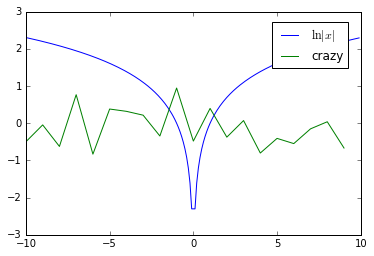

In [89]:
import matplotlib.pyplot as plt
import math
import random

%matplotlib inline
plt.plot(
    [i*0.1 for i in range(-100, 100) if i != 0],
    [math.log(abs(i*0.1)) for i in range(-100, 100) if i != 0],
    label='$\ln |x|$'
)
plt.plot(
    [i for i in range(-10, 10)],
    [random.uniform(-1, 1) for _ in range(-10, 10)],
    label="crazy"
)
plt.legend(bbox_to_anchor=(.98, .98), loc=1)
plt.show()

In [82]:
import string


numbers_to_digits = string.digits + string.ascii_uppercase
    

def convert(n, base1, base2):
    n = int(n, base=base1)
    return convert_from_decimal(n, base2)


def convert_from_decimal(n, base):
    result = ''
    while n > 0:
        result += numbers_to_digits[n % base]
        n //= base
    return result[::-1]

In [83]:
import random


def counting_sort(L, rad, base=10):
    n = len(L)
    buf = [0] * n 
    used_digits = [''] + list(numbers_to_digits[:base])
    num_buckets = base + 1
    count = dict(zip(used_digits, [0]*num_buckets)) 
    for e in L:
        digit = e[len(e)-1-rad:len(e)-rad]
        count[digit] += 1
    for i in range(1, len(used_digits)):
        count[used_digits[i]] += count[used_digits[i-1]]
    for i in range(n-1, -1, -1):
        e = L[i]
        digit = e[len(e)-1-rad:len(e)-rad]
        count[digit] -= 1
        buf[count[digit]] = e
     
    L[:] = buf


def LSD_sort(L, base):
    max_len = len(max(L, key=len))
    for r in range(max_len):
        counting_sort(L, r, base)
        

L = [convert(str(random.randint(1, 100)), 10, 7) for _ in range(10)]
print(L)
LSD_sort(L, 7)
print(L)

['53', '50', '35', '100', '126', '110', '12', '101', '45', '163']
['12', '35', '45', '50', '53', '100', '101', '110', '126', '163']


2: t = 0.19645756495010575  t_total = 0.25173703904983996
3: t = 0.12382836094984669  t_total = 0.16051961119992483
4: t = 0.09784878245009168  t_total = 0.12848648270010016
5: t = 0.08756933889999345  t_total = 0.11488585594997858
6: t = 0.07451713224982086  t_total = 0.10114855044994328
7: t = 0.07456876180003746  t_total = 0.09770110040008148
8: t = 0.06472386005007139  t_total = 0.08676262995031721
9: t = 0.0640099044499948  t_total = 0.08540600374981296
10: t = 0.06645641539944336  t_total = 0.08658884259966726
11: t = 0.06284017079997284  t_total = 0.08269301639993501
12: t = 0.0527569408997806  t_total = 0.07163677889984683
13: t = 0.052078338700084714  t_total = 0.07137848695019784
14: t = 0.05269236070016632  t_total = 0.07100264175023767
15: t = 0.05499281845004589  t_total = 0.07364698749988748
16: t = 0.05304684990005626  t_total = 0.07123375744995428
17: t = 0.05432961984988651  t_total = 0.07238030770022305
18: t = 0.05260717020028096  t_total = 0.07074096590004046
19: t 

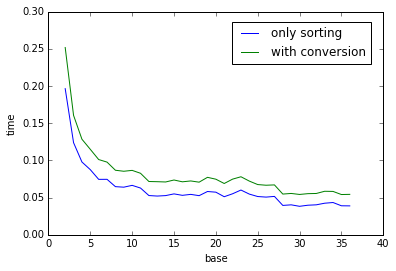

In [91]:
import timeit
import random

import matplotlib
%matplotlib inline


setup = """
import random
L = [i for i in range(1, 2*10**4+1)]
random.shuffle(L)
"""

stmt = """
LL = [convert_from_decimal(n, base) for n in L]
LSD_sort(LL, base)
"""
    
num_repeats = 20

T = []
T_total = []
base_values = list(range(2, 37))
for base in base_values:
    t_total = timeit.timeit(
        setup=setup,
        stmt=stmt,
        globals=dict(
            base=base,
            LSD_sort=LSD_sort,
            convert_from_decimal=convert_from_decimal,
        ),
        number=num_repeats,
    )
    t_conversion = timeit.timeit(
        setup=setup,
        stmt="[convert_from_decimal(n, base) for n in L]",
        number=num_repeats,
        globals=dict(
            base=base,
            convert_from_decimal=convert_from_decimal,
        ),
    )
    t = t_total - t_conversion
    t /= num_repeats
    t_total /= num_repeats
    print("{}: t = {}  t_total = {}".format(base, t, t_total))
    T.append(t)
    T_total.append(t_total)

import matplotlib.pyplot as plt

plt.plot(
    base_values,
    T,
    label='only sorting',
)
plt.plot(
    base_values,
    T_total,
    label='with conversion',
)
plt.xlabel('base')
plt.ylabel('time')
plt.legend(loc=1, bbox_to_anchor=(0.98, 0.98))
# plt.xscale('log')
# plt.yscale('log')
plt.show()


# Задача 4. Гайки и болты

У Вас есть коробка с `N` гайками и коробка с `N` болтами. Известно, что для каждого болта в коробке из-под гаек есть пара подходящего размера. Если взять гайку и болт, то можно определить, подходят ли они друг другу, а если не подходят, то понять, что больше - гайка или болт. В то же врямя невозможно сравнить гайку с гайкой или болт с болтом.

Известно, что для каждой гайки есть только один подходящий болт, и наоборот - для каждого болта есть только одна подходящая гайка.

Напишите алгоритм с временной сложностью $N \log N$, который найдет пару каждому крепежному изделию.

Для Вашего удобства гайки и болты реализованы в виде классов `Nut` и `Bolt`. Экземпляры класса `Nut` можно сравнивать  с помощью операторов `>`, `>=`, `<`, `<=`, `!=`, `==` с экземплярами класса `Bolt`, а экземпляры класса `Bolt` можно сравнивать с экземплярами класса `Nut`. Однако экземпляры одного класса несравнимы: если применить к ним один из перечисленных операторов, будет брошено исключение `ValueError`. Экземпляры `Nut` и `Bolt` инициализируются их размером, а затем над ними можно только выполнять операции сравнения.

### Примеры работы программы

| <font size=3>Входные данные</font> | <font size=3>Выходные данные</font> |
| :---: | :---: |
| <font size=3>4 2 5 3 6 1 7 8 9</font> | <font size=3>[(Nut(1.0), Bolt(1.0)), (Nut(2.0), Bolt(2.0)), (Nut(3.0), Bolt(3.0)), (Nut(4.0), Bolt(4.0)), (Nut(5.0), Bolt(5.0)), (Nut(6.0), Bolt(6.0)), (Nut(7.0), Bolt(7.0)), (Nut(8.0), Bolt(8.0)), (Nut(9.0), Bolt(9.0))]</font> |

### Критерии

1. За решение, использующее $O(n)$ памяти и работающее с временной сложностью $O(n \log n)$, начисляются 4 балла.

2. За решение,  работающее с временной сложностью $O(n \log n)$ и не укладывающееся в требование к использованию памяти, начисляются 3 балла.

In [131]:
import random
from abc import ABC, abstractmethod
    
    
class Fastener(ABC):
    def __init__(self, size):
        self._size = size
        
    @staticmethod
    def compare_nut_and_bolt(arg1, arg2):
        if arg1._size == arg2._size:
            return 0
        elif arg1._size < arg2._size:
            return -1
        else:
            return 1
        
    def __eq__(self, other):
        self._check_other_comparison_operand(other)
        return self.compare_nut_and_bolt(self, other) == 0
    
    def __lt__(self, other):
        self._check_other_comparison_operand(other)
        return self.compare_nut_and_bolt(self, other) < 0
    
    def __gt__(self, other):
        self._check_other_comparison_operand(other)
        return self.compare_nut_and_bolt(self, other) > 0
    
    def __le__(self, other):
        self._check_other_comparison_operand(other)
        return self.compare_nut_and_bolt(self, other) <= 0
    
    def __ge__(self, other):
        self._check_other_comparison_operand(other)
        return self.compare_nut_and_bolt(self, other) >= 0
    
    def __ne__(self, other):
        self._check_other_comparison_operand(other)
        return self.compare_nut_and_bolt(self, other) != 0
    
    @staticmethod
    @abstractmethod
    def _check_other_comparison_operand():
        pass
    
    def __repr__(self):
        return self.__class__.__name__ + '({})'.format(self._size)
    

class Nut(Fastener):
    @staticmethod
    def _check_other_comparison_operand(other):
        if not isinstance(other, Bolt):
            raise ValueError('the other operand of comparison operator has to be a Bolt instance')
        
        
class Bolt(Fastener):
    @staticmethod
    def _check_other_comparison_operand(other):
        if not isinstance(other, Nut):
            raise ValueError('the other operand of comparison operator has to be a Nut instance')


nuts = [Nut(i) for i in range(3)]
bolts = [Bolt(i) for i in range(1, 2)]

def exec_all_comp_ops(arg1, arg2):
    print(arg1 < arg2)
    print(arg1 > arg2)
    print(arg1 == arg2)
    print(arg1 <= arg2)
    print(arg1 >= arg2)
    print(arg1 != arg2)
    print()

for nut in nuts:
    for bolt in bolts:
        exec_all_comp_ops(nut, bolt)
        exec_all_comp_ops(bolt, nut)
        
print(nuts)

nuts[0] > nuts[1]  # try to compare nuts

True
False
False
True
False
True

False
True
False
False
True
True

False
False
True
True
True
False

False
False
True
True
True
False

False
True
False
False
True
True

True
False
False
True
False
True

[Nut(0), Nut(1), Nut(2)]


ValueError: the other operand of comparison operator has to be a Bolt instance

In [132]:
def quick_match(nuts, bolts, lo, hi):
    if hi - lo > 0:
        p = partition(nuts, bolts, lo, hi)
        quick_match(nuts, bolts, lo, p-1)
        quick_match(nuts, bolts, p+1, hi)
        
        
def partition_other(a, lo, hi, outer_pivot):
    left = lo
    mid = lo
    right = hi
    while mid <= right:
        if a[mid] < outer_pivot:
            a[left], a[mid] = a[mid], a[left]
            left += 1
            mid += 1
        elif a[mid] == outer_pivot:
            mid += 1
        else:
            while a[right] > outer_pivot and mid < right:
                right -=1
            a[right], a[mid] = a[mid], a[right]
            right -=1
    return left
        
def partition(nuts, bolts, lo, hi):
    nut_pivot = nuts[(hi+lo) // 2]
    bolt_p_i = partition_other(bolts, lo, hi, nut_pivot)
    bolt_pivot = bolts[bolt_p_i]
    nut_p_i = partition_other(nuts, lo, hi, bolt_pivot)
    return nut_p_i


def form_pairs(nuts, bolts):
    pairs = [0] * len(nuts)
    quick_match(nuts, bolts, 0, len(nuts)-1)
    return list(zip(nuts, bolts))

In [133]:
import random
values = list(map(float, input().split()))
nuts = [Nut(v) for v in values]
random.shuffle(values)
bolts = [Bolt(v) for v in values]

pairs = form_pairs(nuts, bolts)
print(pairs)

1 2 3 4 5 6 7
[(Nut(1.0), Bolt(1.0)), (Nut(2.0), Bolt(2.0)), (Nut(3.0), Bolt(3.0)), (Nut(4.0), Bolt(4.0)), (Nut(5.0), Bolt(5.0)), (Nut(6.0), Bolt(6.0)), (Nut(7.0), Bolt(7.0))]


# Задача 5. Сортировка слиянием с маленьким буфером

Реализуйте сортировку слиянием списка целых чисел с буфером, размер которого равен `(N//2 + 1)`, где $N$ - размер массива.

### Примеры работы программы

| <font size=3>Входные данные</font> | <font size=3>Выходные данные</font> |
| :---: | :---: |
| <font size=3>3 2 3 7 1 8 6 6 6 6 -1 5</font> | <font size=3>-1 1 2 3 3 5 6 6 6 6 7 8</font> |

### Критерии

Правильно реализованная сортировка слиянием, удовлетворяющая ограничениям по памяти, оценивается в 3 балла. 

In [146]:
   
def merge(A, begin, middle, end, buffer):
    second_half_size = end - middle
    for i in range(second_half_size):
        buffer[i] = A[middle+i]
    i, b = middle-1, second_half_size-1
    for k in range(end-1, begin-1, -1):
        if i >= begin and (b < 0 or A[i] > buffer[b]):
            A[k] = A[i]
            i -= 1
        else:
            A[k] = buffer[b]
            b -= 1
            
def small_buffer_merge_sort(A, B):
    buffer = [0] * (len(A)//2 + 1)
    width = 1
    while width < len(A):
        for i in range(0, len(A), 2*width):
            merge(A, i, min(len(A), i + width), min(i + 2 * width, len(A)), buffer)
        width *= 2
            
A = [3, 2, 3, 7, 1, 8, 6, 6, 6, 6, -1, 5]
B = [0]*len(A)
small_buffer_merge_sort(A, B)
print(' '.join(map(str, A)))

-1 1 2 3 3 5 6 6 6 6 7 8


# Задача 6. MSD для сортировки целых чисел

Напишите функцию для сортировки целых чисел с помощью алгоритма MSD.

### Примеры работы программы

| <font size=3>Входные данные</font> | <font size=3>Выходные данные</font> |
| :---: | :---: |
| <font size=3>156 858 722 454 176 536 549 236 61 153 525 647 775 211 245 151 623 925 326 482</font> | <font size=3>61 151 153 156 176 211 236 245 326 454 482 525 536 549 623 647 722 775 858 925</font> |

### Критерии

Правильно реализованная сортировка слиянием, удовлетворяющая ограничениям по памяти, оценивается в 3 балла. 

In [23]:
import random
import math


def get_digit(n, radix):
    q = n // 10**radix
    if q == 0:
        return None
    return q % 10


def counting_sort(L, lo, hi, rad, digits):
    n = hi - lo + 1
    buf = [0] * n 
    num_buckets = len(digits)
    count = dict(zip(digits, [0]*num_buckets)) 
    for i in range(lo, hi+1):
        digit = get_digit(L[i], rad)
        count[digit] += 1
    for i in range(1, len(digits)):
        count[digits[i]] += count[digits[i-1]]
    buffer_markdown = count.copy()
    for i in range(hi, lo-1, -1):
        e = L[i]
        digit = get_digit(e, rad)
        buffer_markdown[digit] -= 1
        buf[buffer_markdown[digit]] = e
    for i in range(lo, hi+1):
        L[i] = buf[i-lo]
    return {d: c + lo for d, c in count.items()}

    
def _MSD_sort(L, lo, hi, rad):
    if hi - lo > 0:
        digits = [None] + [i for i in range(10)]
        if rad < 0:
            return
        count = counting_sort(L, lo, hi, rad, digits)
        k = len(count)
        _MSD_sort(L, lo, count[digits[0]]-1, rad-1)
        for i in range(k-1):
            _MSD_sort(L, count[digits[i]], count[digits[i+1]]-1, rad-1)

def MSD_sort(L):
    max_radix = int(math.log(max(L), 10))
    _MSD_sort(L, 0, len(L)-1, max_radix)

In [65]:
import random
L = [random.randint(0, 1000) for _ in range(20)]
# L = [random.randint(100, 1000) for _ in range(30)]
print(' '.join(map(str, L)))

MSD_sort(L)

print(' '.join(map(str, L)))

156 858 722 454 176 536 549 236 61 153 525 647 775 211 245 151 623 925 326 482
61 151 153 156 176 211 236 245 326 454 482 525 536 549 623 647 722 775 858 925


# Задача 7. Обращение односвязного списка

Допишите в класс `SinglyLinkedList` метод `reverse()`, который развораяивает список в обратном направлении. В результате голова списка должна стать хвостом, а хвост - головой.

### Примеры работы программы

```python
>>> import string
>>> L = SinglyLinkedList()
>>> for c in string.ascii_lowercase[:10]:
>>>     L.add_node(c)
>>> L.reverse()
>>> L.print_list()
a
b
c
d
e
f
g
h
i
j
```

### Критерии

Правильно реализованная сортировка слиянием, удовлетворяющая ограничениям по памяти, оценивается в 1.5 балла. 

In [63]:
class Node:
    def __init__(self, data, next_node=None):
        self.data = data
        self.next_node = next_node

    def get_data(self):
        return self.data

    def set_data(self, val):
        self.data = val

    def get_next_node(self):
        return self.next_node


class SinglyLinkedList:
    def __init__(self):
        self.head = None
        self.size = 0

    def get_size(self):
        return self.size

    def add_node(self, data):
        new_node = Node(data, self.head)
        self.head = new_node
        self.size += 1
       
    def print_list(self):
        curr = self.head
        while curr:
            print(curr.data)
            curr = curr.get_next_node()
    
    def reverse(self):
        if self.head is not None:
            prev = None
            curr = self.head
            while curr.next_node is not None:
                next_ = curr.next_node
                curr.next_node = prev
                prev, curr = curr, next_
            curr.next_node = prev
            self.head = curr


In [64]:
import string
L = SinglyLinkedList()
for c in string.ascii_lowercase[:10]:
    L.add_node(c)
L.print_list()
print()
L.reverse()
L.print_list()

z
y
x
w
v
u
t
s
r
q
p
o
n
m
l
k
j
i
h
g
f
e
d
c
b
a

a
b
c
d
e
f
g
h
i
j
k
l
m
n
o
p
q
r
s
t
u
v
w
x
y
z


In [36]:
s = slice(2, 3).indices(1)
print(s)

(1, 1, 1)


In [37]:
a = [1, 2, 3]
a[5:] = [8, 9]
print(a)

[1, 2, 3, 8, 9]
